# **CSI5155 Assignment 1 - Supervised Learning - Code**

## **Student**

Name: Patrick Loranger<br>
Email: plora079@uottawa.ca<br>
Student Number: 300112374<br>

## **Professor and Teaching Assistants**

Professor: Herna Viktor, hviktor@uottawa.ca<br>
TA: Bahar Emami Afshar, bemam006@uottawa.ca<br>

Course: CSI5155 - Machine Learning<br>
Date: Tuesday, October 15, 2024

<hr/>

## **0. Pre-Processing Data**

Using Python 3.10.8

### 0.1. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

### 0.2. Creating the Chocolate and Mushroom Datasets

In [2]:
# Loading the data
data = pd.read_csv('drug_consumption.data', header=None)

# Selecting the 2 through 13
features = data.iloc[:, 1:13]

# Creating the Chocolate dataset
dataset_choc = features.copy()
dataset_choc['Choc'] = data.iloc[:, 19]

# Creating the Magic Mushrooms dataset
dataset_mushroom = features.copy()
dataset_mushroom['Mushroom'] = data.iloc[:, 28]

# Transforming the labels to binary
mapping = {'CL0': 0, 'CL1': 1, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
dataset_choc['Choc'] = dataset_choc['Choc'].map(mapping)
dataset_mushroom['Mushroom'] = dataset_mushroom['Mushroom'].map(mapping)

### 0.3. Verifying the Chocolate Dataset

In [3]:
dataset_choc.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Choc
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


In [4]:
print(dataset_choc['Choc'].value_counts())

1    1853
0      32
Name: Choc, dtype: int64


### 0.4. Verifying the Mushroom Dataset

In [5]:
dataset_mushroom.head()

,1,2,3,4,5,6,7,8,9,10,11,12,Mushroom
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


In [6]:
print(dataset_mushroom['Mushroom'].value_counts())

0    982
1    903
Name: Mushroom, dtype: int64


### 0.5. Using Sci-Kit Learn train_test_split on the Chocolate and Mushroom Datasets

In [7]:
# Chocolate
X_choc = dataset_choc.drop('Choc', axis=1)
y_choc = dataset_choc['Choc']
X_choc_train, X_choc_test, y_choc_train, y_choc_test = train_test_split(X_choc, y_choc, test_size=0.3, random_state=36)

# Mushroom
X_mushroom = dataset_mushroom.drop('Mushroom', axis=1)
y_mushroom = dataset_mushroom['Mushroom']
X_mushroom_train, X_mushroom_test, y_mushroom_train, y_mushroom_test = train_test_split(X_mushroom, y_mushroom, test_size=0.3, random_state=36)

### 0.6. Creating an Evaluation Function to Output the Confusion Matrix, Recall and Precision

In [8]:
def eval(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    # Printing the model name
    print(f"Model: {model_name}")
    # Getting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # I want my confusion matrix to be in the following order instead of the default order
    #
    # The default sci-kit learn confusion matrix order is this:
    # [TN, FP]
    # [FN, TP]
    #
    # I want it to be in this order, because I find the other one confusing:
    # [TP, FP]
    # [FN, TN]
    TN, FP, FN, TP = cm.ravel()
    cm_new = [[TP, FP], [FN, TN]]
    print("Confusion Matrix:")
    print(f"[{cm_new[0][0]}, {cm_new[0][1]}]")
    print(f"[{cm_new[1][0]}, {cm_new[1][1]}]")
    # Getting the recall
    recall = recall_score(y_test, y_pred)
    print(f"Recall: {recall: .4f}")
    # Getting the precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision: {precision: .4f}")
    # Seperator
    print("-" * 40)

<hr/>

# **A. Supervised Learning [30 marks]**

## **1. Classification Task for Chocolate Users**

### 1.1. Constructing the 6 Models for the Chocolate Dataset

In [9]:
# Decision Tree
dt_choc = DecisionTreeClassifier(random_state=36)
dt_choc.fit(X_choc_train, y_choc_train)

# Random Forest
rf_choc = RandomForestClassifier(random_state=36)
rf_choc.fit(X_choc_train, y_choc_train)

# Support Vector Machine
svm_choc = SVC(probability=True, random_state=36)
svm_choc.fit(X_choc_train, y_choc_train)

# Gradient Boosting
gb_choc = GradientBoostingClassifier(random_state=36)
gb_choc.fit(X_choc_train, y_choc_train)

# Multi Layer Perceptron
mlp_choc = MLPClassifier(random_state=36, max_iter=2500)
mlp_choc.fit(X_choc_train, y_choc_train)

# K-Nearest Neighbors
knn_choc = KNeighborsClassifier()
knn_choc.fit(X_choc_train, y_choc_train)

KNeighborsClassifier()

### 1.2. Evaluating the 6 Models for the Chocolate Dataset

In [10]:
eval(dt_choc, "Decision Tree", X_choc_test, y_choc_test)
eval(rf_choc, "Random Forest", X_choc_test, y_choc_test)
eval(svm_choc, "Support Vector Machine", X_choc_test, y_choc_test)
eval(gb_choc, "Gradient Boosting", X_choc_test, y_choc_test)
eval(mlp_choc, "Multi-Layer Perceptron", X_choc_test, y_choc_test)
eval(knn_choc, "k-Nearest Neighbor", X_choc_test, y_choc_test)

Model: Decision Tree
Confusion Matrix:
[550, 8]
[7, 1]
Recall:  0.9874
Precision:  0.9857
----------------------------------------
Model: Random Forest
Confusion Matrix:
[557, 9]
[0, 0]
Recall:  1.0000
Precision:  0.9841
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[557, 9]
[0, 0]
Recall:  1.0000
Precision:  0.9841
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[555, 8]
[2, 1]
Recall:  0.9964
Precision:  0.9858
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[554, 9]
[3, 0]
Recall:  0.9946
Precision:  0.9840
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[557, 9]
[0, 0]
Recall:  1.0000
Precision:  0.9841
----------------------------------------


### 1.3. Plotting the ROC Curve for the 6 Models in the Chocolate Dataset

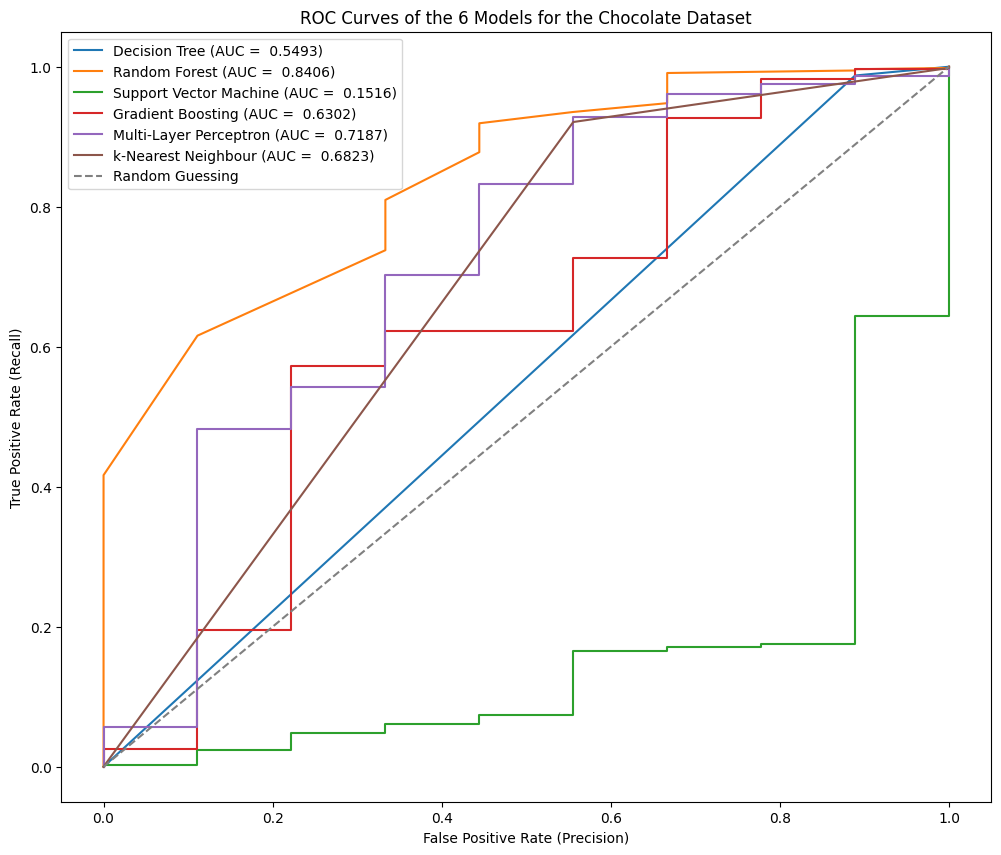

In [11]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree
y_probs_dt = dt_choc.predict_proba(X_choc_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_choc_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_choc_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest
y_probs_rf = rf_choc.predict_proba(X_choc_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_choc_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_choc_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine
y_probs_svm = svm_choc.predict_proba(X_choc_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_choc_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_choc_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting
y_probs_gb = gb_choc.predict_proba(X_choc_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_choc_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_choc_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron
y_probs_mlp = mlp_choc.predict_proba(X_choc_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_choc_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_choc_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor
y_probs_knn = knn_choc.predict_proba(X_choc_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_choc_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_choc_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Models for the Chocolate Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='upper left')
plt.show()

## **2. Classification Task for Magic Mushroom Users**

### 2.1. Constructing the 6 Models for the Magic Mushroom Dataset

In [12]:
# Decision Tree
dt_mushroom = DecisionTreeClassifier(random_state=36)
dt_mushroom.fit(X_mushroom_train, y_mushroom_train)

# Random Forest
rf_mushroom = RandomForestClassifier(random_state=36)
rf_mushroom.fit(X_mushroom_train, y_mushroom_train)

# Support Vector Machine
svm_mushroom = SVC(probability=True, random_state=36)
svm_mushroom.fit(X_mushroom_train, y_mushroom_train)

# Gradient Boosting
gb_mushroom = GradientBoostingClassifier(random_state=36)
gb_mushroom.fit(X_mushroom_train, y_mushroom_train)

# Multi-Layer Perceptron
mlp_mushroom = MLPClassifier(random_state=36, max_iter=2500)
mlp_mushroom.fit(X_mushroom_train, y_mushroom_train)

# k-Nearest Neighbor
knn_mushroom = KNeighborsClassifier()
knn_mushroom.fit(X_mushroom_train, y_mushroom_train)

KNeighborsClassifier()

### 2.2. Evaluating the 6 Models for the Magic Mushroom Dataset

In [13]:
eval(dt_mushroom, "Decision Tree", X_mushroom_test, y_mushroom_test)
eval(rf_mushroom, "Random Forest", X_mushroom_test, y_mushroom_test)
eval(svm_mushroom, "Support Vector Machine", X_mushroom_test, y_mushroom_test)
eval(gb_mushroom, "Gradient Boosting", X_mushroom_test, y_mushroom_test)
eval(mlp_mushroom, "Multi-Layer Perceptron", X_mushroom_test, y_mushroom_test)
eval(knn_mushroom, "k-Nearest Neighbor", X_mushroom_test, y_mushroom_test)

Model: Decision Tree
Confusion Matrix:
[159, 111]
[110, 186]
Recall:  0.5911
Precision:  0.5889
----------------------------------------
Model: Random Forest
Confusion Matrix:
[206, 98]
[63, 199]
Recall:  0.7658
Precision:  0.6776
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[202, 87]
[67, 210]
Recall:  0.7509
Precision:  0.6990
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[206, 95]
[63, 202]
Recall:  0.7658
Precision:  0.6844
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[162, 107]
[107, 190]
Recall:  0.6022
Precision:  0.6022
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[188, 108]
[81, 189]
Recall:  0.6989
Precision:  0.6351
----------------------------------------


### 2.3. Plotting the ROC Curve for the 6 Models in the Magic Mushroom Dataset

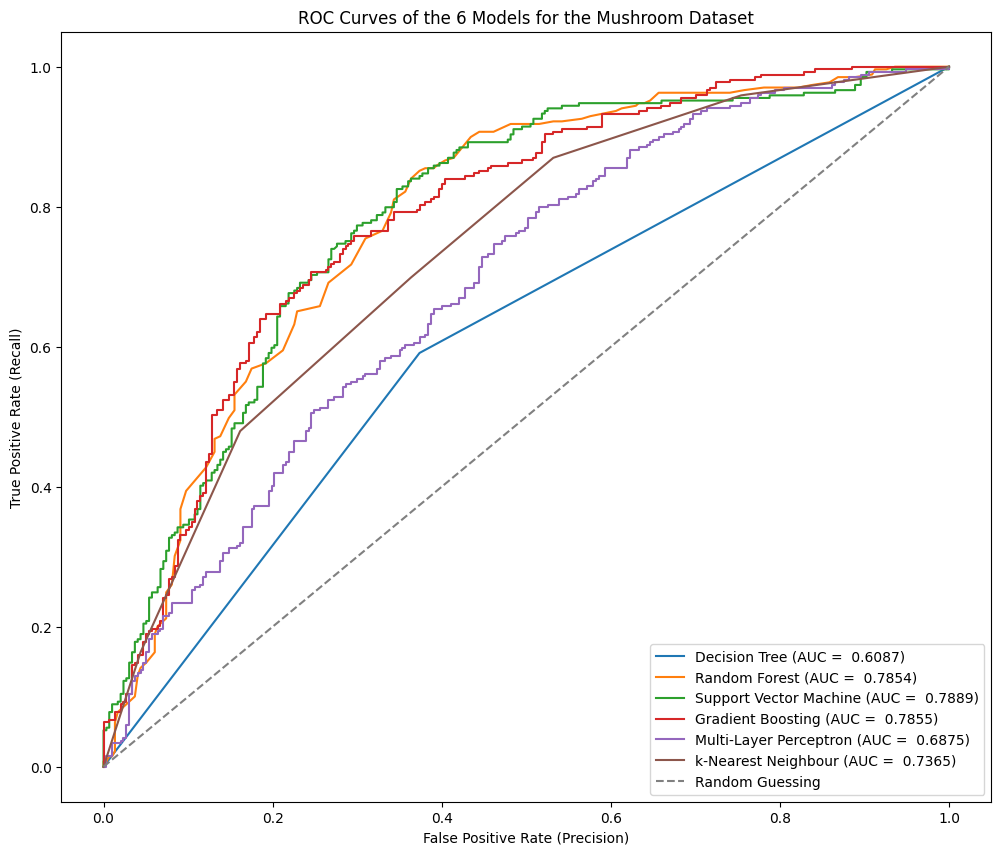

In [14]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree
y_probs_dt = dt_mushroom.predict_proba(X_mushroom_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_mushroom_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_mushroom_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest
y_probs_rf = rf_mushroom.predict_proba(X_mushroom_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_mushroom_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_mushroom_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine
y_probs_svm = svm_mushroom.predict_proba(X_mushroom_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_mushroom_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_mushroom_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting
y_probs_gb = gb_mushroom.predict_proba(X_mushroom_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_mushroom_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_mushroom_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron
y_probs_mlp = mlp_mushroom.predict_proba(X_mushroom_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_mushroom_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_mushroom_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor
y_probs_knn = knn_mushroom.predict_proba(X_mushroom_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_mushroom_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_mushroom_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Models for the Mushroom Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

<hr/>

# **B. Class Imbalance [40 marks]**

## **3. Data Balancing for 'Chocolate'**

### 3.1. Under Sampling the Chocolate Dataset with the RandomUnderSampler

In [15]:
rus_choc = RandomUnderSampler(random_state=36)
X_choc_us, y_choc_us = rus_choc.fit_resample(X_choc_train, y_choc_train)

### 3.2. Constructing the 6 Under Sampled Models for the Chocolate Dataset

In [16]:
# Decision Tree with Undersampling
dt_choc_us = DecisionTreeClassifier(random_state=36)
dt_choc_us.fit(X_choc_us, y_choc_us)

# Random Forest with Undersampling
rf_choc_us = RandomForestClassifier(random_state=36)
rf_choc_us.fit(X_choc_us, y_choc_us)

# Support Vector Machine with Undersampling
svm_choc_us = SVC(probability=True, random_state=36)
svm_choc_us.fit(X_choc_us, y_choc_us)

# Gradient Boosting with Undersampling
gb_choc_us = GradientBoostingClassifier(random_state=36)
gb_choc_us.fit(X_choc_us, y_choc_us)

# Multi Layer Perceptron with Undersampling
mlp_choc_us = MLPClassifier(random_state=36, max_iter=2500)
mlp_choc_us.fit(X_choc_us, y_choc_us)

# K-Nearest Neighbors with Undersampling
knn_choc_us = KNeighborsClassifier()
knn_choc_us.fit(X_choc_us, y_choc_us)

KNeighborsClassifier()

### 3.3. Evaluating the 6 Under Sampled Models for the Chocolate Dataset

In [17]:
eval(dt_choc_us, "Decision Tree", X_choc_test, y_choc_test)
eval(rf_choc_us, "Random Forest", X_choc_test, y_choc_test)
eval(svm_choc_us, "Support Vector Machine", X_choc_test, y_choc_test)
eval(gb_choc_us, "Gradient Boosting", X_choc_test, y_choc_test)
eval(mlp_choc_us, "Multi-Layer Perceptron", X_choc_test, y_choc_test)
eval(knn_choc_us, "k-Nearest Neighbor", X_choc_test, y_choc_test)

Model: Decision Tree
Confusion Matrix:
[346, 4]
[211, 5]
Recall:  0.6212
Precision:  0.9886
----------------------------------------
Model: Random Forest
Confusion Matrix:
[325, 2]
[232, 7]
Recall:  0.5835
Precision:  0.9939
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[363, 4]
[194, 5]
Recall:  0.6517
Precision:  0.9891
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[322, 3]
[235, 6]
Recall:  0.5781
Precision:  0.9908
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[330, 3]
[227, 6]
Recall:  0.5925
Precision:  0.9910
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[273, 4]
[284, 5]
Recall:  0.4901
Precision:  0.9856
----------------------------------------


### 3.4. Plotting the ROC Curve for the 6 Under Sampled Models in the Chocolate Dataset

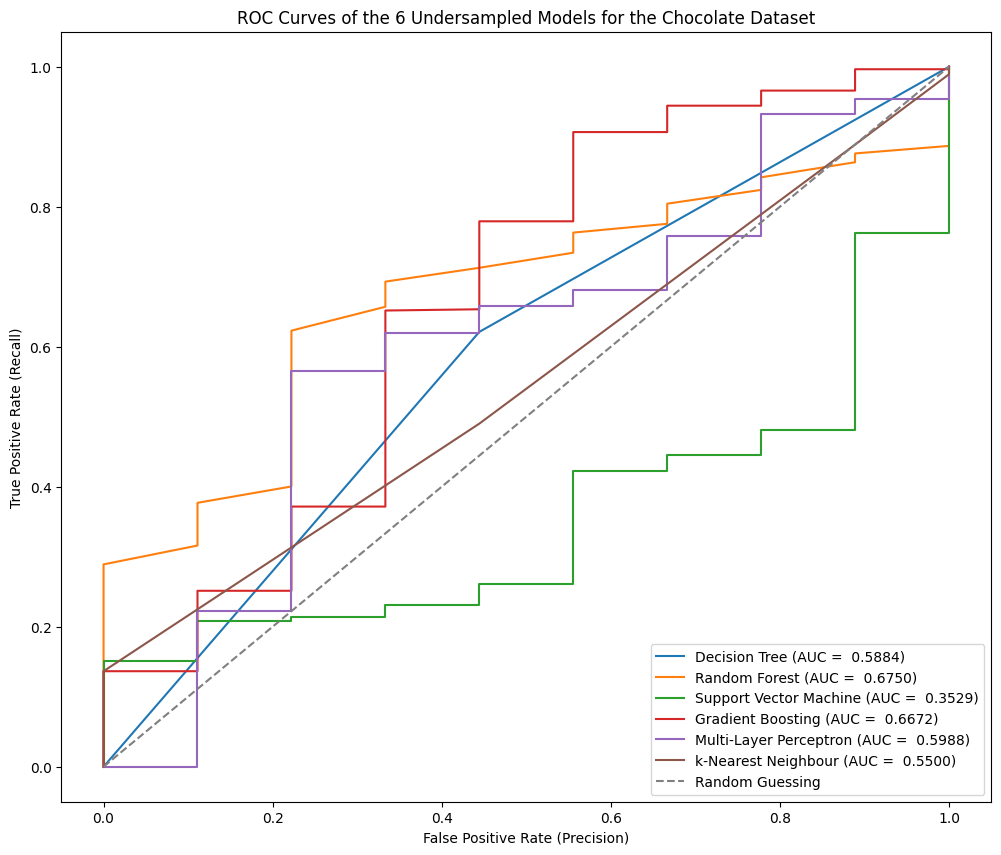

In [18]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree with Undersampling
y_probs_dt = dt_choc_us.predict_proba(X_choc_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_choc_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_choc_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest with Undersampling
y_probs_rf = rf_choc_us.predict_proba(X_choc_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_choc_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_choc_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine with Undersampling
y_probs_svm = svm_choc_us.predict_proba(X_choc_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_choc_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_choc_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting with Undersampling
y_probs_gb = gb_choc_us.predict_proba(X_choc_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_choc_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_choc_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron with Undersampling
y_probs_mlp = mlp_choc_us.predict_proba(X_choc_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_choc_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_choc_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor with Undersampling
y_probs_knn = knn_choc_us.predict_proba(X_choc_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_choc_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_choc_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Undersampled Models for the Chocolate Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

### 3.5. Over Sampling the Chocolate Dataset with SMOTE

In [19]:
smote_choc = SMOTE(random_state=36)
X_choc_os, y_choc_os = smote_choc.fit_resample(X_choc_train, y_choc_train)

### 3.6. Constructing the 6 Over Sampled Models for the Chocolate Dataset

In [20]:
# Decision Tree with Oversampling
dt_choc_os = DecisionTreeClassifier(random_state=36)
dt_choc_os.fit(X_choc_os, y_choc_os)

# Random Forest with Oversampling
rf_choc_os = RandomForestClassifier(random_state=36)
rf_choc_os.fit(X_choc_os, y_choc_os)

# Support Vector Machine with Oversampling
svm_choc_os = SVC(probability=True, random_state=36)
svm_choc_os.fit(X_choc_os, y_choc_os)

# Gradient Boosting with Oversampling
gb_choc_os = GradientBoostingClassifier(random_state=36)
gb_choc_os.fit(X_choc_os, y_choc_os)

# Multi Layer Perceptron with Oversampling
mlp_choc_os = MLPClassifier(random_state=36, max_iter=2500)
mlp_choc_os.fit(X_choc_os, y_choc_os)

# K-Nearest Neighbors with Oversampling
knn_choc_os = KNeighborsClassifier()
knn_choc_os.fit(X_choc_os, y_choc_os)

KNeighborsClassifier()

### 3.7. Evaluating the 6 Over Sampled Models for the Chocolate Dataset

In [21]:
eval(dt_choc_os, "Decision Tree", X_choc_test, y_choc_test)
eval(rf_choc_os, "Random Forest", X_choc_test, y_choc_test)
eval(svm_choc_os, "Support Vector Machine", X_choc_test, y_choc_test)
eval(gb_choc_os, "Gradient Boosting", X_choc_test, y_choc_test)
eval(mlp_choc_os, "Multi-Layer Perceptron", X_choc_test, y_choc_test)
eval(knn_choc_os, "k-Nearest Neighbor", X_choc_test, y_choc_test)

Model: Decision Tree
Confusion Matrix:
[533, 8]
[24, 1]
Recall:  0.9569
Precision:  0.9852
----------------------------------------
Model: Random Forest
Confusion Matrix:
[557, 9]
[0, 0]
Recall:  1.0000
Precision:  0.9841
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[525, 7]
[32, 2]
Recall:  0.9425
Precision:  0.9868
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[552, 9]
[5, 0]
Recall:  0.9910
Precision:  0.9840
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[546, 8]
[11, 1]
Recall:  0.9803
Precision:  0.9856
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[460, 3]
[97, 6]
Recall:  0.8259
Precision:  0.9935
----------------------------------------


### 3.8. Plotting the ROC Curve for the 6 Over Sampled Models in the Chocolate Dataset

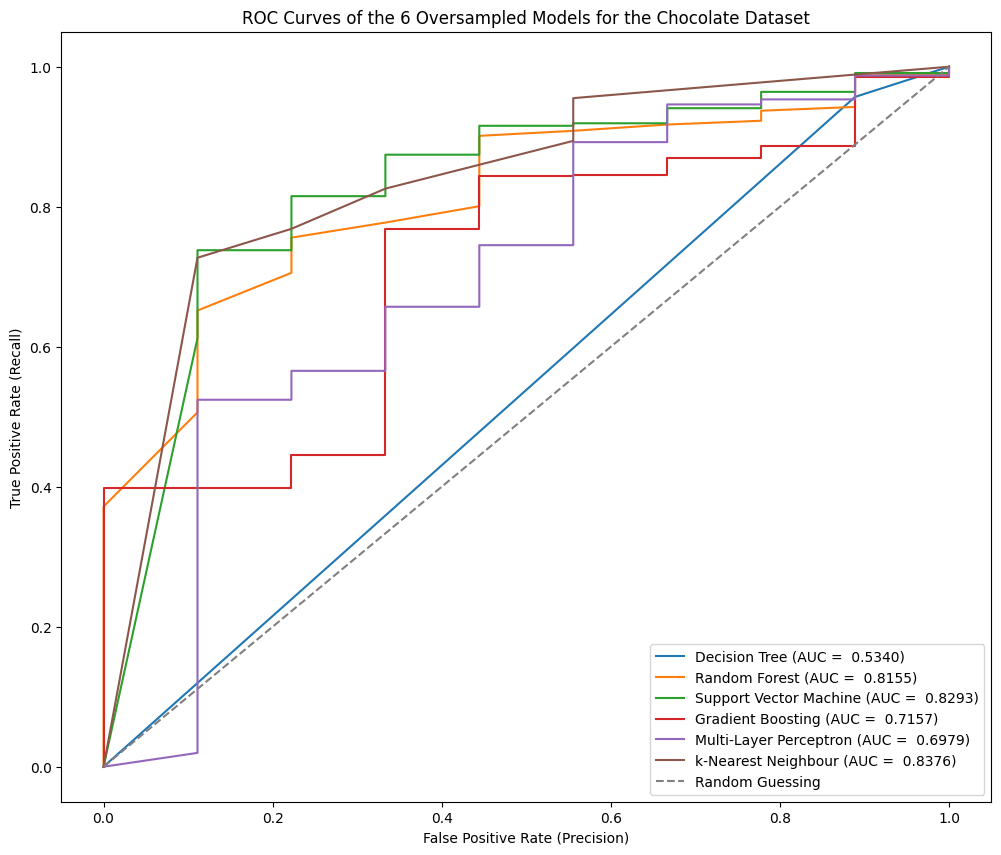

In [22]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree with Oversampling
y_probs_dt = dt_choc_os.predict_proba(X_choc_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_choc_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_choc_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest with Oversampling
y_probs_rf = rf_choc_os.predict_proba(X_choc_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_choc_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_choc_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine with Oversampling
y_probs_svm = svm_choc_os.predict_proba(X_choc_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_choc_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_choc_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting with Oversampling
y_probs_gb = gb_choc_os.predict_proba(X_choc_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_choc_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_choc_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron with Oversampling
y_probs_mlp = mlp_choc_os.predict_proba(X_choc_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_choc_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_choc_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor with Oversampling
y_probs_knn = knn_choc_os.predict_proba(X_choc_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_choc_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_choc_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Oversampled Models for the Chocolate Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

### 3.9. Combined Sampling the Chocolate Dataset

In [23]:
rus_choc_2 = RandomUnderSampler(sampling_strategy=0.2, random_state=36)
X_choc_us_2, y_choc_us_2 = rus_choc_2.fit_resample(X_choc_train, y_choc_train)

smote_choc_2 = SMOTE(sampling_strategy=0.9, random_state=36)
X_choc_combined, y_choc_combined = smote_choc_2.fit_resample(X_choc_us_2, y_choc_us_2)

### 3.10. Constructing the 6 Combined Sampled Models for the Chocolate Dataset

In [24]:
# Decision Tree with Combined Sampling
dt_choc_combined = DecisionTreeClassifier(random_state=36)
dt_choc_combined.fit(X_choc_combined, y_choc_combined)

# Random Forest with Combined Sampling
rf_choc_combined = RandomForestClassifier(random_state=36)
rf_choc_combined.fit(X_choc_combined, y_choc_combined)

# Support Vector Machine with Combined Sampling
svm_choc_combined = SVC(probability=True, random_state=36)
svm_choc_combined.fit(X_choc_combined, y_choc_combined)

# Gradient Boosting with Combined Sampling
gb_choc_combined = GradientBoostingClassifier(random_state=36)
gb_choc_combined.fit(X_choc_combined, y_choc_combined)

# Multi Layer Perceptron with Combined Sampling
mlp_choc_combined = MLPClassifier(random_state=36, max_iter=2500)
mlp_choc_combined.fit(X_choc_combined, y_choc_combined)

# K-Nearest Neighbors with Combined Sampling
knn_choc_combined = KNeighborsClassifier()
knn_choc_combined.fit(X_choc_combined, y_choc_combined)

KNeighborsClassifier()

### 3.11. Evaluating the 6 Combined Sampled Models for the Chocolate Dataset

In [25]:
eval(dt_choc_combined, "Decision Tree", X_choc_test, y_choc_test)
eval(rf_choc_combined, "Random Forest", X_choc_test, y_choc_test)
eval(svm_choc_combined, "Support Vector Machine", X_choc_test, y_choc_test)
eval(gb_choc_combined, "Gradient Boosting", X_choc_test, y_choc_test)
eval(mlp_choc_combined, "Multi-Layer Perceptron", X_choc_test, y_choc_test)
eval(knn_choc_combined, "k-Nearest Neighbor", X_choc_test, y_choc_test)

Model: Decision Tree
Confusion Matrix:
[449, 3]
[108, 6]
Recall:  0.8061
Precision:  0.9934
----------------------------------------
Model: Random Forest
Confusion Matrix:
[521, 5]
[36, 4]
Recall:  0.9354
Precision:  0.9905
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[482, 5]
[75, 4]
Recall:  0.8654
Precision:  0.9897
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[501, 5]
[56, 4]
Recall:  0.8995
Precision:  0.9901
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[485, 5]
[72, 4]
Recall:  0.8707
Precision:  0.9898
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[321, 1]
[236, 8]
Recall:  0.5763
Precision:  0.9969
----------------------------------------


### 3.12. Plotting the ROC Curve for the 6 Combined Sampled Models in the Chocolate Dataset

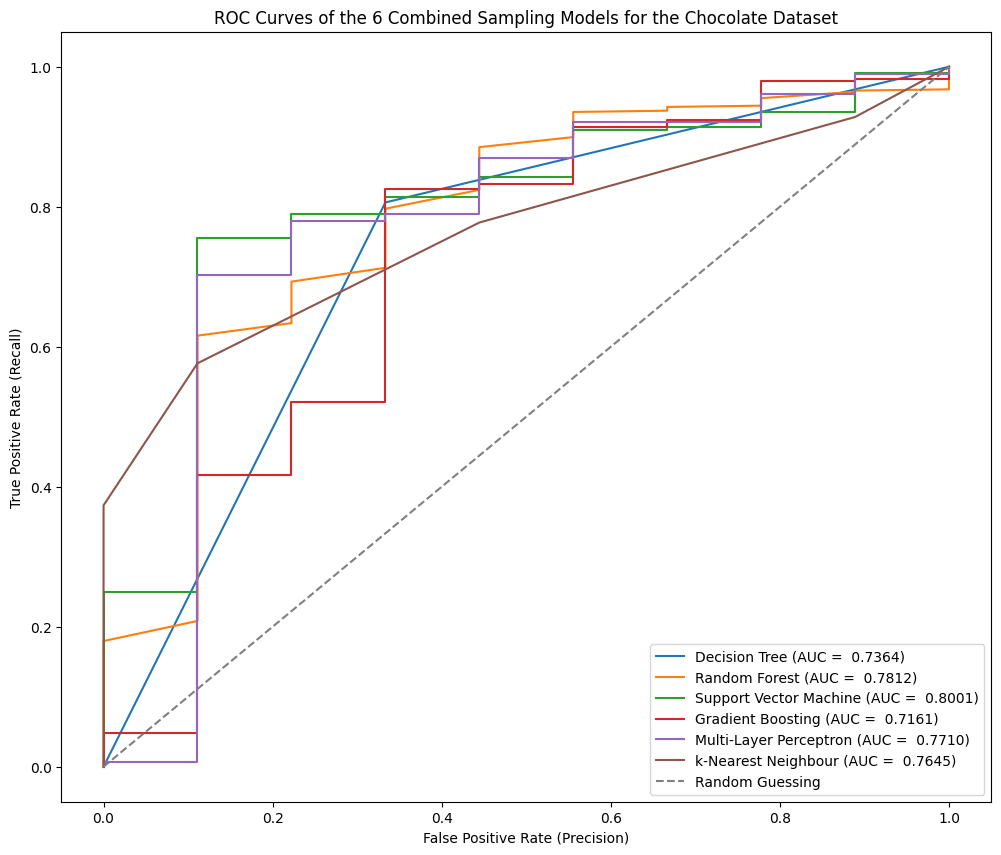

In [26]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree with Combined Sampling
y_probs_dt = dt_choc_combined.predict_proba(X_choc_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_choc_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_choc_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest with Combined Sampling
y_probs_rf = rf_choc_combined.predict_proba(X_choc_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_choc_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_choc_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine with Combined Sampling
y_probs_svm = svm_choc_combined.predict_proba(X_choc_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_choc_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_choc_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting with Combined Sampling
y_probs_gb = gb_choc_combined.predict_proba(X_choc_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_choc_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_choc_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron with Combined Sampling
y_probs_mlp = mlp_choc_combined.predict_proba(X_choc_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_choc_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_choc_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor with Combined Sampling
y_probs_knn = knn_choc_combined.predict_proba(X_choc_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_choc_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_choc_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Combined Sampling Models for the Chocolate Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

## **4. Data Balancing for 'Mushrooms'**

### 4.1. Under Sampling the Magic Mushroom Dataset with the RandomUnderSampler

In [27]:
rus_mushroom = RandomUnderSampler(random_state=36)
X_mushroom_us, y_mushroom_us = rus_mushroom.fit_resample(X_mushroom_train, y_mushroom_train)

### 4.2. Constructing the 6 Under Sampled Models for the Magic Mushroom Dataset 

In [28]:
# Decision Tree with Undersampling
dt_mushroom_us = DecisionTreeClassifier(random_state=36)
dt_mushroom_us.fit(X_mushroom_us, y_mushroom_us)

# Random Forest with Undersampling
rf_mushroom_us = RandomForestClassifier(random_state=36)
rf_mushroom_us.fit(X_mushroom_us, y_mushroom_us)

# Support Vector Machine with Undersampling
svm_mushroom_us = SVC(probability=True, random_state=36)
svm_mushroom_us.fit(X_mushroom_us, y_mushroom_us)

# Gradient Boosting with Undersampling
gb_mushroom_us = GradientBoostingClassifier(random_state=36)
gb_mushroom_us.fit(X_mushroom_us, y_mushroom_us)

# Multi-Layer Perceptron with Undersampling
mlp_mushroom_us = MLPClassifier(random_state=36, max_iter=2500)
mlp_mushroom_us.fit(X_mushroom_us, y_mushroom_us)

# k-Nearest Neighbor with Undersampling
knn_mushroom_us = KNeighborsClassifier()
knn_mushroom_us.fit(X_mushroom_us, y_mushroom_us)

KNeighborsClassifier()

### 4.3. Evaluating the 6 Under Sampled Models for the Magic Mushroom Dataset

In [29]:
eval(dt_mushroom_us, "Decision Tree", X_mushroom_test, y_mushroom_test)
eval(rf_mushroom_us, "Random Forest", X_mushroom_test, y_mushroom_test)
eval(svm_mushroom_us, "Support Vector Machine", X_mushroom_test, y_mushroom_test)
eval(gb_mushroom_us, "Gradient Boosting", X_mushroom_test, y_mushroom_test)
eval(mlp_mushroom_us, "Multi-Layer Perceptron", X_mushroom_test, y_mushroom_test)
eval(knn_mushroom_us, "k-Nearest Neighbor", X_mushroom_test, y_mushroom_test)

Model: Decision Tree
Confusion Matrix:
[163, 109]
[106, 188]
Recall:  0.6059
Precision:  0.5993
----------------------------------------
Model: Random Forest
Confusion Matrix:
[213, 99]
[56, 198]
Recall:  0.7918
Precision:  0.6827
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[213, 100]
[56, 197]
Recall:  0.7918
Precision:  0.6805
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[214, 100]
[55, 197]
Recall:  0.7955
Precision:  0.6815
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[168, 106]
[101, 191]
Recall:  0.6245
Precision:  0.6131
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[193, 114]
[76, 183]
Recall:  0.7175
Precision:  0.6287
----------------------------------------


### 4.4. Plotting the ROC Curve for the 6 Under Sampled Models in the Magic Mushroom Dataset

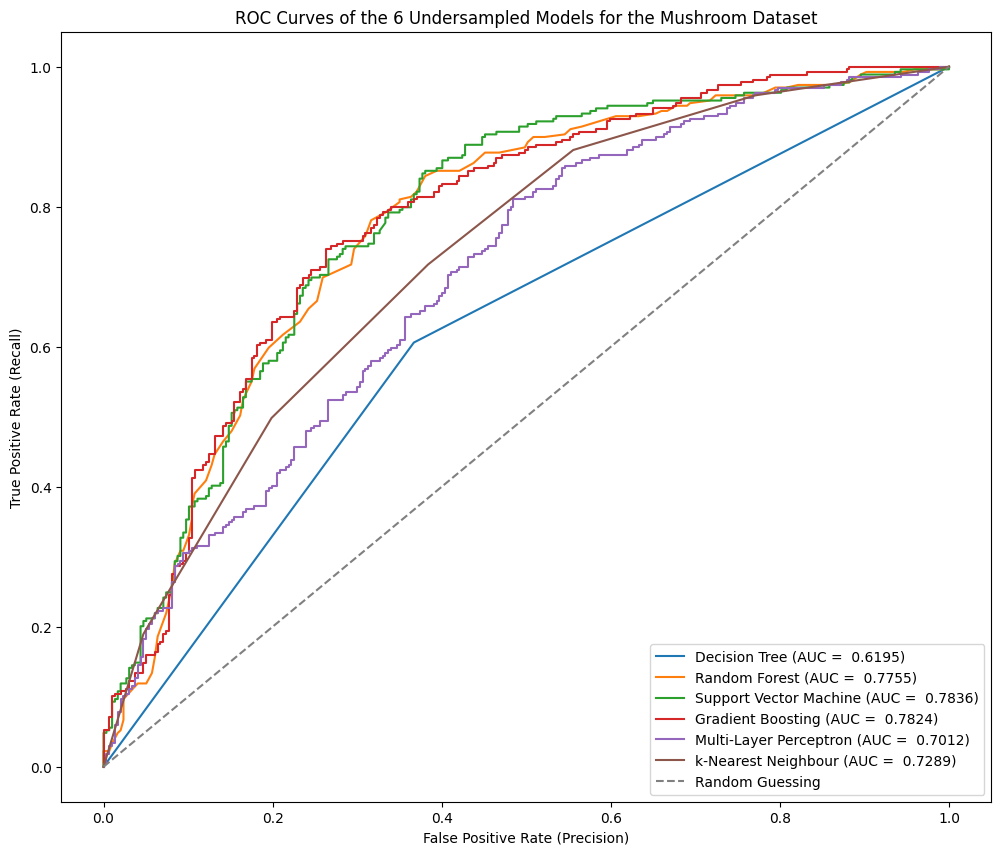

In [30]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree with Undersampling
y_probs_dt = dt_mushroom_us.predict_proba(X_mushroom_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_mushroom_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_mushroom_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest with Undersampling
y_probs_rf = rf_mushroom_us.predict_proba(X_mushroom_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_mushroom_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_mushroom_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine with Undersampling
y_probs_svm = svm_mushroom_us.predict_proba(X_mushroom_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_mushroom_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_mushroom_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting with Undersampling
y_probs_gb = gb_mushroom_us.predict_proba(X_mushroom_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_mushroom_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_mushroom_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron with Undersampling
y_probs_mlp = mlp_mushroom_us.predict_proba(X_mushroom_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_mushroom_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_mushroom_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor with Undersampling
y_probs_knn = knn_mushroom_us.predict_proba(X_mushroom_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_mushroom_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_mushroom_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Undersampled Models for the Mushroom Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

### 4.5. Over Sampling the Magic Mushroom Dataset with SMOTE

In [31]:
smote_mushroom = SMOTE(random_state=36)
X_mushroom_os, y_mushroom_os = smote_mushroom.fit_resample(X_mushroom_train, y_mushroom_train)

### 4.6. Constructing the 6 Over Sampled Models for the Magic Mushroom Dataset

In [32]:
# Decision Tree with Oversampling
dt_mushroom_os = DecisionTreeClassifier(random_state=36)
dt_mushroom_os.fit(X_mushroom_os, y_mushroom_os)

# Random Forest with Oversampling
rf_mushroom_os = RandomForestClassifier(random_state=36)
rf_mushroom_os.fit(X_mushroom_os, y_mushroom_os)

# Support Vector Machine with Oversampling
svm_mushroom_os = SVC(probability=True, random_state=36)
svm_mushroom_os.fit(X_mushroom_os, y_mushroom_os)

# Gradient Boosting with Oversampling
gb_mushroom_os = GradientBoostingClassifier(random_state=36)
gb_mushroom_os.fit(X_mushroom_os, y_mushroom_os)

# Multi-Layer Perceptron with Oversampling
mlp_mushroom_os = MLPClassifier(random_state=36, max_iter=2500)
mlp_mushroom_os.fit(X_mushroom_os, y_mushroom_os)

# k-Nearest Neighbor with Oversampling
knn_mushroom_os = KNeighborsClassifier()
knn_mushroom_os.fit(X_mushroom_os, y_mushroom_os)

KNeighborsClassifier()

### 4.7. Evaluating the 6 Over Sampled Models for the Magic Mushroom Dataset

In [33]:
eval(dt_mushroom_os, "Decision Tree", X_mushroom_test, y_mushroom_test)
eval(rf_mushroom_os, "Random Forest", X_mushroom_test, y_mushroom_test)
eval(svm_mushroom_os, "Support Vector Machine", X_mushroom_test, y_mushroom_test)
eval(gb_mushroom_os, "Gradient Boosting", X_mushroom_test, y_mushroom_test)
eval(mlp_mushroom_os, "Multi-Layer Perceptron", X_mushroom_test, y_mushroom_test)
eval(knn_mushroom_os, "k-Nearest Neighbor", X_mushroom_test, y_mushroom_test)

Model: Decision Tree
Confusion Matrix:
[166, 108]
[103, 189]
Recall:  0.6171
Precision:  0.6058
----------------------------------------
Model: Random Forest
Confusion Matrix:
[205, 90]
[64, 207]
Recall:  0.7621
Precision:  0.6949
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[208, 96]
[61, 201]
Recall:  0.7732
Precision:  0.6842
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[208, 99]
[61, 198]
Recall:  0.7732
Precision:  0.6775
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[175, 106]
[94, 191]
Recall:  0.6506
Precision:  0.6228
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[191, 120]
[78, 177]
Recall:  0.7100
Precision:  0.6141
----------------------------------------


### 4.8. Plotting the ROC Curve for the 6 Over Sampled Models in the Magic Mushroom Dataset

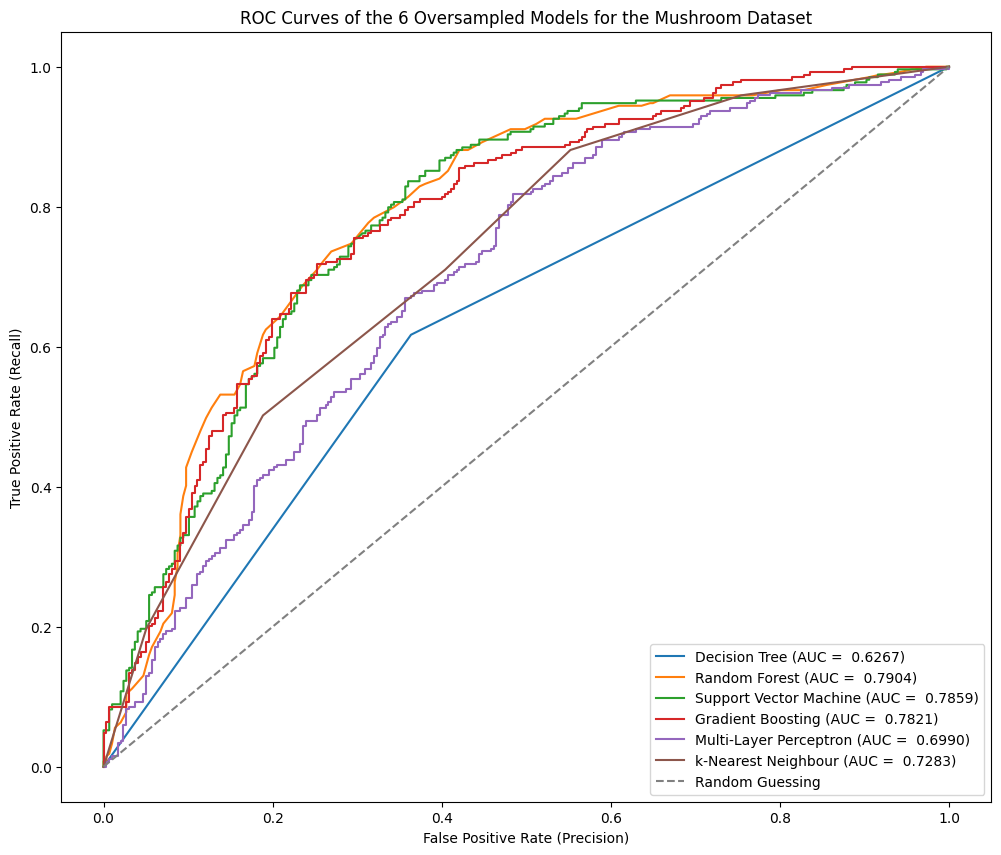

In [34]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree with Oversampling
y_probs_dt = dt_mushroom_os.predict_proba(X_mushroom_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_mushroom_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_mushroom_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest with Oversampling
y_probs_rf = rf_mushroom_os.predict_proba(X_mushroom_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_mushroom_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_mushroom_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine with Oversampling
y_probs_svm = svm_mushroom_os.predict_proba(X_mushroom_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_mushroom_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_mushroom_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting with Oversampling
y_probs_gb = gb_mushroom_os.predict_proba(X_mushroom_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_mushroom_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_mushroom_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron with Oversampling
y_probs_mlp = mlp_mushroom_os.predict_proba(X_mushroom_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_mushroom_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_mushroom_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor with Oversampling
y_probs_knn = knn_mushroom_os.predict_proba(X_mushroom_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_mushroom_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_mushroom_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Oversampled Models for the Mushroom Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

### 4.9. Combined Sampling the Magic Mushroom Dataset

In [35]:
rus_mushroom_2 = RandomUnderSampler(random_state=36)
X_mushroom_us_2, y_mushroom_us_2 = rus_mushroom_2.fit_resample(X_mushroom_train, y_mushroom_train)

smote_mushroom_2 = SMOTE(random_state=36)
X_mushroom_combined, y_mushroom_combined = smote_mushroom_2.fit_resample(X_mushroom_us_2, y_mushroom_us_2)

### 4.10. Constructing the 6 Combined Sampled Models for the Magic Mushroom Dataset

In [36]:
# Decision Tree with Combined Sampling
dt_mushroom_combined = DecisionTreeClassifier(random_state=36)
dt_mushroom_combined.fit(X_mushroom_combined, y_mushroom_combined)

# Random Forest with Combined Sampling
rf_mushroom_combined = RandomForestClassifier(random_state=36)
rf_mushroom_combined.fit(X_mushroom_combined, y_mushroom_combined)

# Support Vector Machine with Combined Sampling
svm_mushroom_combined = SVC(probability=True, random_state=36)
svm_mushroom_combined.fit(X_mushroom_combined, y_mushroom_combined)

# Gradient Boosting with Combined Sampling
gb_mushroom_combined = GradientBoostingClassifier(random_state=36)
gb_mushroom_combined.fit(X_mushroom_combined, y_mushroom_combined)

# Multi Layer Perceptron with Combined Sampling
mlp_mushroom_combined = MLPClassifier(random_state=36, max_iter=2500)
mlp_mushroom_combined.fit(X_mushroom_combined, y_mushroom_combined)

# K-Nearest Neighbors with Combined Sampling
knn_mushroom_combined = KNeighborsClassifier()
knn_mushroom_combined.fit(X_mushroom_combined, y_mushroom_combined)

KNeighborsClassifier()

### 4.11. Evaluating the 6 Combined Sampled Models for the Magic Mushroom Dataset

In [37]:
eval(dt_mushroom_combined, "Decision Tree", X_mushroom_test, y_mushroom_test)
eval(rf_mushroom_combined, "Random Forest", X_mushroom_test, y_mushroom_test)
eval(svm_mushroom_combined, "Support Vector Machine", X_mushroom_test, y_mushroom_test)
eval(gb_mushroom_combined, "Gradient Boosting", X_mushroom_test, y_mushroom_test)
eval(mlp_mushroom_combined, "Multi-Layer Perceptron", X_mushroom_test, y_mushroom_test)
eval(knn_mushroom_combined, "k-Nearest Neighbor", X_mushroom_test, y_mushroom_test)

Model: Decision Tree
Confusion Matrix:
[163, 109]
[106, 188]
Recall:  0.6059
Precision:  0.5993
----------------------------------------
Model: Random Forest
Confusion Matrix:
[213, 99]
[56, 198]
Recall:  0.7918
Precision:  0.6827
----------------------------------------
Model: Support Vector Machine
Confusion Matrix:
[213, 100]
[56, 197]
Recall:  0.7918
Precision:  0.6805
----------------------------------------
Model: Gradient Boosting
Confusion Matrix:
[214, 100]
[55, 197]
Recall:  0.7955
Precision:  0.6815
----------------------------------------
Model: Multi-Layer Perceptron
Confusion Matrix:
[168, 106]
[101, 191]
Recall:  0.6245
Precision:  0.6131
----------------------------------------
Model: k-Nearest Neighbor
Confusion Matrix:
[193, 114]
[76, 183]
Recall:  0.7175
Precision:  0.6287
----------------------------------------


### 4.12. Plotting the ROC Curve for the 6 Combined Sampled Models in the Magic Mushroom Dataset

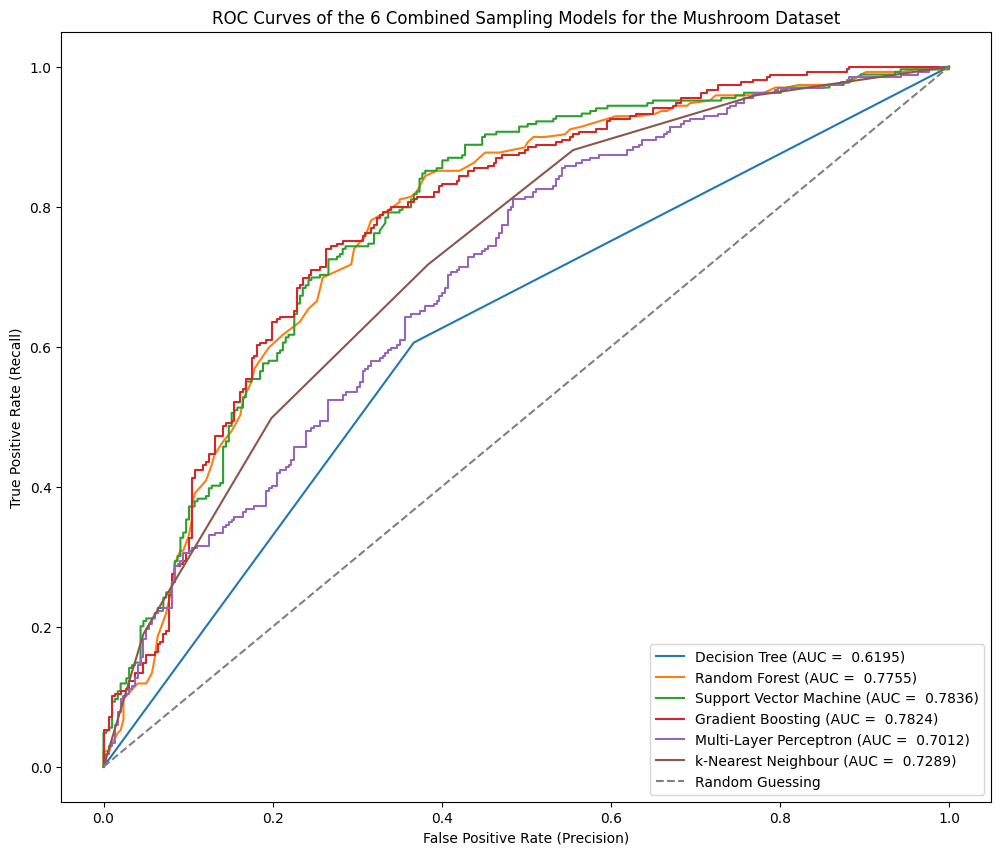

In [38]:
plt.figure(figsize=(12, 10), dpi=100)

# ROC Decision Tree with Combined Sampling
y_probs_dt = dt_mushroom_combined.predict_proba(X_mushroom_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_mushroom_test, y_probs_dt)
auc_score_dt = roc_auc_score(y_mushroom_test, y_probs_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_score_dt: .4f})')

# ROC Random Forest with Combined Sampling
y_probs_rf = rf_mushroom_combined.predict_proba(X_mushroom_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_mushroom_test, y_probs_rf)
auc_score_rf = roc_auc_score(y_mushroom_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_score_rf: .4f})')

# ROC Support Vector Machine with Combined Sampling
y_probs_svm = svm_mushroom_combined.predict_proba(X_mushroom_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_mushroom_test, y_probs_svm)
auc_score_svm = roc_auc_score(y_mushroom_test, y_probs_svm)
plt.plot(fpr_svm, tpr_svm, label=f'Support Vector Machine (AUC = {auc_score_svm: .4f})')

# ROC Gradient Boosting with Combined Sampling
y_probs_gb = gb_mushroom_combined.predict_proba(X_mushroom_test)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_mushroom_test, y_probs_gb)
auc_score_gb = roc_auc_score(y_mushroom_test, y_probs_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {auc_score_gb: .4f})')

# ROC Multi-Layer Perceptron with Combined Sampling
y_probs_mlp = mlp_mushroom_combined.predict_proba(X_mushroom_test)[:, 1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_mushroom_test, y_probs_mlp)
auc_score_mlp = roc_auc_score(y_mushroom_test, y_probs_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'Multi-Layer Perceptron (AUC = {auc_score_mlp: .4f})')

# ROC k-Nearest Neighbor with Combined Sampling
y_probs_knn = knn_mushroom_combined.predict_proba(X_mushroom_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_mushroom_test, y_probs_knn)
auc_score_knn = roc_auc_score(y_mushroom_test, y_probs_knn)
plt.plot(fpr_knn, tpr_knn, label=f'k-Nearest Neighbour (AUC = {auc_score_knn: .4f})')

# ROC Random Guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

# ROC Information
plt.title('ROC Curves of the 6 Combined Sampling Models for the Mushroom Dataset')
plt.xlabel('False Positive Rate (Precision)')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.show()

<hr/>

# **C. Discussion, Synthesis and Summary [30 marks]**

(535 words)

In this assignment, I was given a dataset that could be used to assess an individual's risk of drug use and abuse considering a wide set of factors. This dataset has 1885 instances, with each instance containing 12 features and 18 different types of drugs. For this assignment, I was only studying two drugs, those being Chocolate and Magic Mushrooms. After the data processing and conversion to a binary classification task, I constructed 6 models for data analysis: decision tree (DT), random forest (RF), support vector machine (SVM), gradient boosting ensemble (GB), multi-layer perceptron (MLP) and a k-nearest neighbour classifier (k-NN). In the next few paragraphs I will give a summary of the performance of each algorithm and an explanation on the impacts of rebalancing each dataset.

Now, I will briefly describe the results for the Chocolate dataset. On the original data, the RF (AUC = 0.84) performs the best and the SVM (AUC = 0.15) performs very poorly. When undersampling the majority class, RF still performs the best (AUC = 0.67) and the SVM is still the worst (AUC = 0.35). The other algorithms have all slightly improved. When oversampling the minority class, the best performance is k-NN (AUC = 0.83) and the DT is (AUC = 0.53). I can notice a major improvement with the SVM (AUC = 0.82). Undersampling the minority that has such an imbalance is very helpful in a case like this. Finally, when rebalancing with both methods, we see major improvements in the results seen in the ROC curves. All of the algorithms have an AUC > 0.7, which is much better than the random guessing line. After analysing the Chocolate dataset, we see that rebalancing data has a massive impact on the classification abilities of the algorithms. 

The results for the Magic Mushroom dataset were much different than the ones seen in the Chocolate dataset. Throughout the data analysis of the Magic Mushroom dataset, we notice that every algorithm performs with an AUC slightly above 0.7, except for the DT which has an AUC slightly above 0.6. These lines have slight variance after the undersampling of the majority class, after the oversampling of the minority class and after the rebalancing with both methods. After analysing the Magic Mushroom dataset, it is clear that the rebalancing of the data has little to no impact on the classification abilities of the algorithm's performances. 

My conclusion for these results is as follows. I believe the Chocolate dataset performs so much better with data resampling due to the fact that it is an extremely unbalanced dataset to begin with. At the start, there were 1853 users, and 32 non-users. This class imbalance allows for significant improvement in the classification tasks due to the fact that we can get better results with less of the majority class, and more of the minority class. The Magic Mushroom dataset on the other hand is the complete opposite of the Chocolate dataset. This dataset is very balanced from the beginning, with 903 users, and 982 non-users. The effects of the majority class undersampling, minority class oversampling, and data rebalancing were very minor due to the fact that this dataset was balanced from the start. 
